In [1]:
# cnn model
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

Using TensorFlow backend.


### Read the train & test and preprocessing

In [2]:
#Load the data, split into training/testing groups
d=datasets.load_breast_cancer()
X=d.data
Y=d.target

x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

In [3]:
x_train.shape[1]*x_train.shape[0]

11940

### Creation structure of CNN

In [4]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=100, kernel_size=10, activation='relu', input_shape=(X.shape[1],1)))
    #model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dropout(0.5))
    
    #model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#     model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Dropout(0.5))
    
    model.add(Flatten())
#     model.add(Dense(X.shape[1]))
#     model.add(Activation('relu'))
    
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [5]:
# Parametres
verbose, epochs, batch_size = 1, 100, 32
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 712us/step - loss: 29.6360 - accuracy: 0.4698 - val_loss: 4.9546 - val_accuracy: 0.4094
Epoch 2/100
398/398 [==============================] - 0s 170us/step - loss: 18.9073 - accuracy: 0.5377 - val_loss: 1.6452 - val_accuracy: 0.8187
Epoch 3/100
398/398 [==============================] - 0s 205us/step - loss: 13.2262 - accuracy: 0.6256 - val_loss: 1.4317 - val_accuracy: 0.7485
Epoch 4/100
398/398 [==============================] - 0s 168us/step - loss: 10.4074 - accuracy: 0.6683 - val_loss: 1.8590 - val_accuracy: 0.7427
Epoch 5/100
398/398 [==============================] - 0s 243us/step - loss: 9.8191 - accuracy: 0.6457 - val_loss: 0.5756 - val_accuracy: 0.9240
Epoch 6/100
398/398 [==============================] - 0s 185us/step - loss: 9.4210 - accuracy: 0.6533 - val_loss: 1.3359 - val_accuracy: 0.90

Epoch 51/100
398/398 [==============================] - 0s 168us/step - loss: 0.7479 - accuracy: 0.8417 - val_loss: 0.5253 - val_accuracy: 0.8538
Epoch 52/100
398/398 [==============================] - 0s 193us/step - loss: 0.8993 - accuracy: 0.8342 - val_loss: 0.3191 - val_accuracy: 0.9123
Epoch 53/100
398/398 [==============================] - 0s 176us/step - loss: 0.4735 - accuracy: 0.8719 - val_loss: 0.3424 - val_accuracy: 0.9123
Epoch 54/100
398/398 [==============================] - 0s 163us/step - loss: 0.5465 - accuracy: 0.8467 - val_loss: 0.2170 - val_accuracy: 0.9298
Epoch 55/100
398/398 [==============================] - 0s 166us/step - loss: 0.3698 - accuracy: 0.8920 - val_loss: 0.4899 - val_accuracy: 0.8421
Epoch 56/100
398/398 [==============================] - 0s 168us/step - loss: 0.4287 - accuracy: 0.8719 - val_loss: 0.2080 - val_accuracy: 0.9298
Epoch 57/100
398/398 [==============================] - 0s 242us/step - loss: 0.4710 - accuracy: 0.8593 - val_loss: 0.1884 -

In [6]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

171/171 [==============================] - 0s 105us/step


[0.17538799999053017, 0.9356725215911865]

In [7]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.935672514619883


In [8]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 21, 100)           1100      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 100)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 700)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1402      
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 2,502
Trainable params: 2,502
Non-trainable params: 0
____________________________________________________

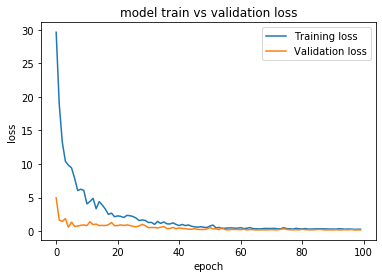

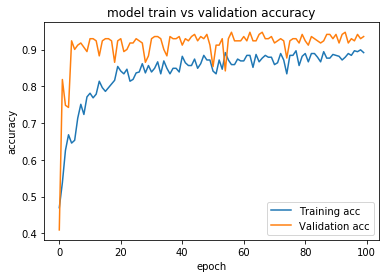

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [10]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [11]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [12]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape)

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape)

Training Features (from CNN) Shape: (398, 2)
Training Labels (from CNN) Shape: (398,)
Test Features (from CNN) Shape: (171, 2)
Test Labels (from CNN) Shape: (171,)


### Classification by CNN + Random Forest + MLP

In [13]:
from djinn import djinn

print("djinn breast_cancer")    
modelname="class_djinn_breast_cancer"   # name the model
ntrees=4               # number of trees = number of neural nets in ensemble
maxdepth=4            # max depth of tree -- optimize this for each data set
dropout_keep=0.5 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)

x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
# epochs=optimal['epochs']
batchsize=32
learnrate=0.006
epochs=100
    
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn breast_cancer




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Epoch: 0001 cost= 0.802740065 accuracy= 0.603
Epoch: 0002 cost= 0.690113501 accuracy= 0.587
Epoch: 0003 cost= 0.651179157 accuracy= 0.598
Epoch: 0004 cost= 0.657153471 accuracy= 0.617
Epoch: 0005 cost= 0.682126766 accuracy= 0.615
Epoch: 0006 cost= 0.663567456 accuracy= 0.617
Epoch: 0007 cost= 0.671139

Epoch: 0033 cost= 0.566542856 accuracy= 0.757
Epoch: 0034 cost= 0.597130206 accuracy= 0.718
Epoch: 0035 cost= 0.561724289 accuracy= 0.709
Epoch: 0036 cost= 0.526510472 accuracy= 0.796
Epoch: 0037 cost= 0.495335075 accuracy= 0.777
Epoch: 0038 cost= 0.517269972 accuracy= 0.751
Epoch: 0039 cost= 0.475738504 accuracy= 0.779
Epoch: 0040 cost= 0.462019465 accuracy= 0.788
Epoch: 0041 cost= 0.457312457 accuracy= 0.771
Epoch: 0042 cost= 0.421165103 accuracy= 0.804
Epoch: 0043 cost= 0.437322668 accuracy= 0.804
Epoch: 0044 cost= 0.434084854 accuracy= 0.791
Epoch: 0045 cost= 0.498595701 accuracy= 0.804
Epoch: 0046 cost= 0.442084039 accuracy= 0.830
Epoch: 0047 cost= 0.451409096 accuracy= 0.821
Epoch: 0048 cost= 0.423311775 accuracy= 0.804
Epoch: 0049 cost= 0.419836779 accuracy= 0.818
Epoch: 0050 cost= 0.425808996 accuracy= 0.838
Epoch: 0051 cost= 0.451239759 accuracy= 0.810
Epoch: 0052 cost= 0.428449978 accuracy= 0.838
Epoch: 0053 cost= 0.394114692 accuracy= 0.830
Epoch: 0054 cost= 0.383621064 accu

Epoch: 0011 cost= 0.644957374 accuracy= 0.656
Epoch: 0012 cost= 0.599535693 accuracy= 0.704
Epoch: 0013 cost= 0.604265435 accuracy= 0.676
Epoch: 0014 cost= 0.568349998 accuracy= 0.682
Epoch: 0015 cost= 0.596152663 accuracy= 0.682
Epoch: 0016 cost= 0.587212424 accuracy= 0.668
Epoch: 0017 cost= 0.590281286 accuracy= 0.684
Epoch: 0018 cost= 0.579374541 accuracy= 0.709
Epoch: 0019 cost= 0.555140306 accuracy= 0.721
Epoch: 0020 cost= 0.523206835 accuracy= 0.791
Epoch: 0021 cost= 0.501230413 accuracy= 0.765
Epoch: 0022 cost= 0.532568571 accuracy= 0.729
Epoch: 0023 cost= 0.496224902 accuracy= 0.777
Epoch: 0024 cost= 0.510049216 accuracy= 0.765
Epoch: 0025 cost= 0.486653258 accuracy= 0.771
Epoch: 0026 cost= 0.437643463 accuracy= 0.821
Epoch: 0027 cost= 0.464851163 accuracy= 0.785
Epoch: 0028 cost= 0.464931036 accuracy= 0.810
Epoch: 0029 cost= 0.443139063 accuracy= 0.830
Epoch: 0030 cost= 0.430549188 accuracy= 0.821
Epoch: 0031 cost= 0.378192241 accuracy= 0.824
Epoch: 0032 cost= 0.394849444 accu

### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [14]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


# define the keras model
MLP = Sequential()
MLP.add(Dense(32, input_dim=out_cnn_train.shape[1], activation='relu'))
MLP.add(Dense(64, activation='relu'))
MLP.add(Dense(1, activation='sigmoid'))
# compile the keras model
MLP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
MLP.fit(out_cnn_train, y_train, epochs=100, batch_size=3)
# make class predictions with the model
predictions = MLP.predict_classes(x_test)
#accuracy_MLP
accuracy_MLP=accuracy_score(predictions , y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
398/398 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8769
Epoch 2/100
398/398 [==============================] - 0s 639us/step - loss: 0.2411 - accuracy: 0.9020
Epoch 3/100
398/398 [==============================] - 0s 602us/step - loss: 0.2311 - accuracy: 0.9045
Epoch 4/100
398/398 [==============================] - 0s 526us/step - loss: 0.2243 - accuracy: 0.9045
Epoch 5/100
398/398 [==============================] - 0s 511us/step - loss: 0.2235 - accuracy: 0.9045
Epoch 6/100
398/398 [==============================] - 0s 566us/step - loss: 0.2171 - accuracy: 0.9045
Epoch 7/100
398/398 [==============================] - 0s 727us/step - loss: 0.2208 - accuracy: 0.9045
Epoch 8/100
398/398 [==============================] - 0s 599us/step - loss: 0.2251 - accuracy: 0.9095
Epoch 9/100
398/398 [==============================] - 0s 645us/step - loss: 0.229

398/398 [==============================] - 0s 613us/step - loss: 0.2071 - accuracy: 0.9095
Epoch 72/100
398/398 [==============================] - 0s 594us/step - loss: 0.2067 - accuracy: 0.9121
Epoch 73/100
398/398 [==============================] - 0s 516us/step - loss: 0.2022 - accuracy: 0.9146
Epoch 74/100
398/398 [==============================] - 0s 541us/step - loss: 0.2071 - accuracy: 0.9095
Epoch 75/100
398/398 [==============================] - 0s 854us/step - loss: 0.2081 - accuracy: 0.9121
Epoch 76/100
398/398 [==============================] - 0s 669us/step - loss: 0.2045 - accuracy: 0.9171
Epoch 77/100
398/398 [==============================] - 0s 634us/step - loss: 0.2021 - accuracy: 0.9146
Epoch 78/100
398/398 [==============================] - 0s 599us/step - loss: 0.2063 - accuracy: 0.9196
Epoch 79/100
398/398 [==============================] - 0s 624us/step - loss: 0.2033 - accuracy: 0.9171
Epoch 80/100
398/398 [==============================] - 0s 823us/step - loss:

In [15]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [16]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=10)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [17]:
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('Accuracy CNN+MLP     :: {:.4f}'.format(accuracy_MLP),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy RF          :: 0.9825 %.
Accuracy Extrat      :: 0.9591 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.9357 %.
Accuracy CNN+RF      :: 0.9415 %.
Accuracy CNN+Extrat  :: 0.9123 %.
Accuracy CNN+SVM     :: 0.9415 %.
Accuracy CNN+XGBoost :: 0.9298 %.
Accuracy CNN+DTree   :: 0.9123 %.
Accuracy CNN+MLP     :: 0.9240 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.8480 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM using cv=10     :: 0.9210 %.
Accuracy CNN+rf  using cv=10     :: 0.9123 %.
Accuracy CNN+XGBoost using cv=10 :: 0.9210 %.


In [18]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py